# PUBG Prediction Analysis

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#reading the train data
pubg = pd.read_csv('train_V2.csv')

In [8]:
pubg.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [9]:
#Every column there is !
pubg.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [10]:
#I am going to work on the first 1million rows of data since my machine can't really handle 4.2m otherwise
pubg = pubg[:1000000]

In [11]:
pubg.shape

(1000000, 29)

### Let's see if we have any missing data !

In [12]:
pubg.describe().iloc[0,:] 

assists            1000000.0
boosts             1000000.0
damageDealt        1000000.0
DBNOs              1000000.0
headshotKills      1000000.0
heals              1000000.0
killPlace          1000000.0
killPoints         1000000.0
kills              1000000.0
killStreaks        1000000.0
longestKill        1000000.0
matchDuration      1000000.0
maxPlace           1000000.0
numGroups          1000000.0
rankPoints         1000000.0
revives            1000000.0
rideDistance       1000000.0
roadKills          1000000.0
swimDistance       1000000.0
teamKills          1000000.0
vehicleDestroys    1000000.0
walkDistance       1000000.0
weaponsAcquired    1000000.0
winPoints          1000000.0
winPlacePerc       1000000.0
Name: count, dtype: float64

In [13]:
%matplotlib inline

### Visualising missing data if any !

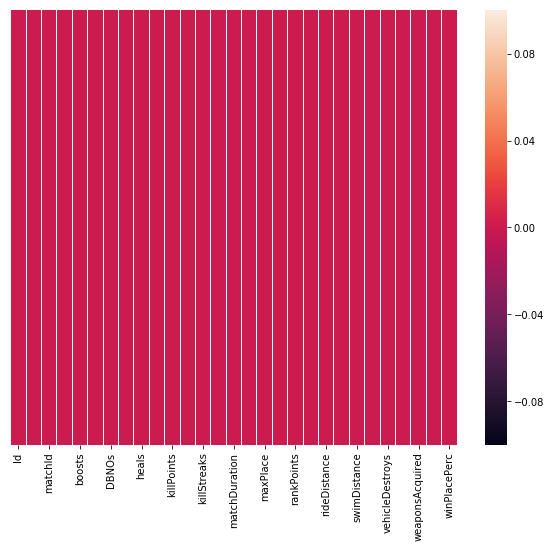

In [14]:
sns.heatmap(pubg.isnull(),yticklabels=False)
f = plt.gcf()
f.set_size_inches(10,8)

Before starting with EDA or anything else, I am going to change the matchTypes to the three main ones which we personally know and love !

In [15]:
pubg['matchType'].value_counts()

squad-fpp           395314
duo-fpp             223647
squad               141479
solo-fpp            120270
duo                  70175
solo                 41245
normal-squad-fpp      3827
crashfpp              1366
normal-duo-fpp        1246
flaretpp               543
normal-solo-fpp        394
flarefpp               162
normal-squad           133
crashtpp                86
normal-solo             74
normal-duo              39
Name: matchType, dtype: int64

In [16]:
#converting them
pubg['matchType'].replace(['squad-fpp','duo-fpp','solo-fpp','normal-squad-fpp','crashfpp','normal-duo-fpp','flaretpp',
                           'normal-solo-fpp','flarefpp','normal-squad','crashtpp','normal-solo','normal-duo'],
                          ['squad','duo','solo','squad','others','duo','others','solo','others','squad',
                          'others','solo','duo'],inplace=True)
#others matchtype represent names of types which I can't personally distinguish as solo/squad/duo even after searching on kaggle

In [17]:
pubg['matchType'].value_counts()

squad     540753
duo       295107
solo      161983
others      2157
Name: matchType, dtype: int64

# 1. EDA (Exploratory Data Analysis)

## 1.1 Assists

Assists : Number of enemy players this player damaged that were killed by teammates

In [19]:
pubg['assists'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,assists
0,825239
1,132878
2,30600
3,8045
4,2197
5,641
6,204
7,110
8,35
9,16


/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5,1,'Assists vs winPlacePerc')

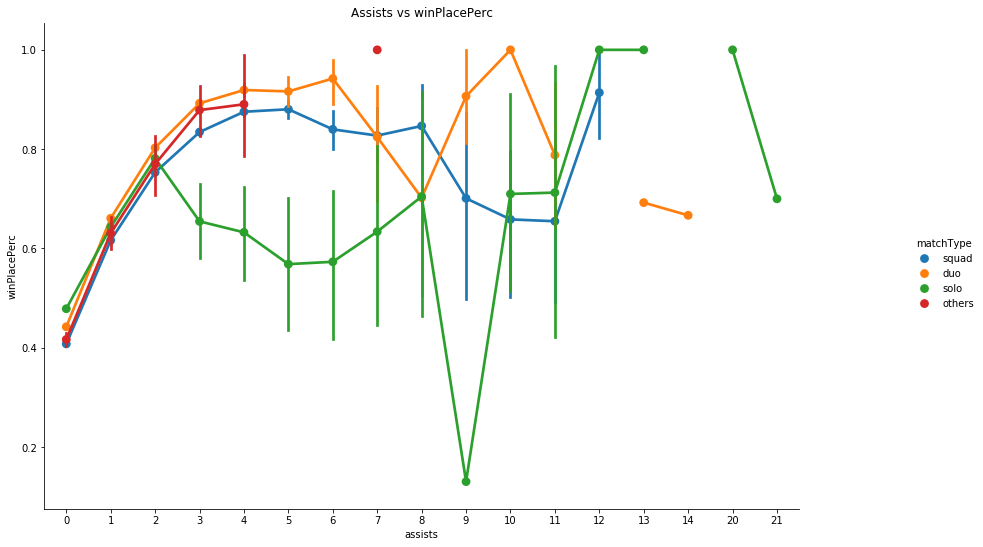

In [20]:
sns.factorplot('assists','winPlacePerc',hue='matchType',data=pubg)
f = plt.gcf()
f.set_size_inches(15,8)
plt.title('Assists vs winPlacePerc')

Now personally speaking I don't really think assists should have been given importance in solos since you can't really knock someone is solos. I don't understand what it represents, maybe killing someone who has already been shot by someone else and has low health.

Nevertheless, Having assists till 5-6 values is a good indication of having a good winPlacePercentage.

But that decreases after 8-9 assists. This could potentially represent players who are good only at assists than  killing and winning ! Remember this is going to matter more in squads since assists might help your team to go forward in the game but if you are only good at assisting and not killing chances of victory are substantially reduced !

## 1.2 Boosts

Boosts : Number of boost items used. (Energy Drinks, PainKillers, Adrenaline Syringe)

In [21]:
pd.crosstab(pubg.boosts,pubg.matchType).style.background_gradient(cmap='summer_r')

matchType,duo,others,solo,squad
boosts,,,,
0,168432,1087,98355,298682
1,45543,379,21804,85469
2,31886,280,16035,62083
3,19143,201,9150,38393
4,12550,110,6295,25131
5,7963,48,4161,14844
6,4690,20,2694,8342
7,2552,14,1635,4375
8,1308,10,916,1991


In [22]:
x = pubg[pubg['boosts']<6].count()[0]/pubg.shape[0]*100
print('Percentage of players who used less than 6 boosts per game : ',x)

Percentage of players who used less than 6 boosts per game :  96.8024


Majority of the people use less than 6 boosts per game ! 

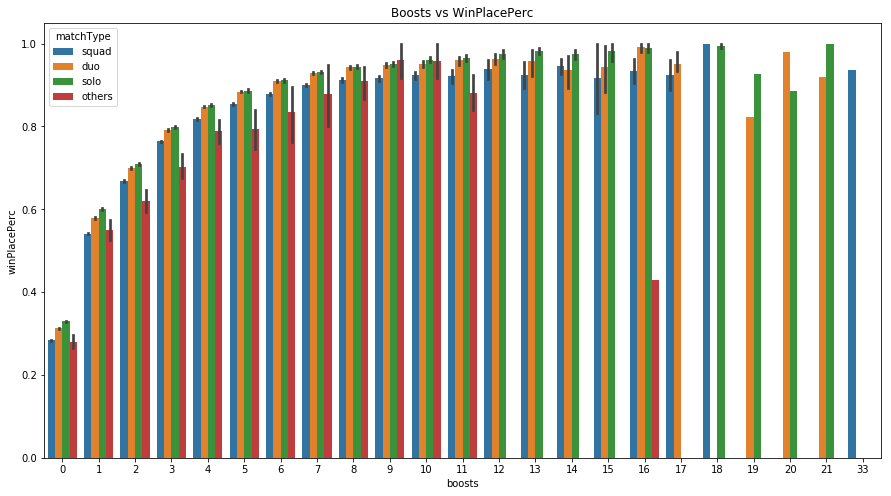

In [23]:
sns.barplot('boosts','winPlacePerc',hue='matchType',data=pubg)
plt.title('Boosts vs WinPlacePerc')
f = plt.gcf()
f.set_size_inches(15,8)

From the graph and cross tab above, it is evident that players using more than 5-6 boosts per game are less in number but have higher chances of winning ! This is quite understandable in itself.

## 1.3 DamageDealt

Damage Dealt : Total damage dealt. Note: Self inflicted damage is subtracted

Damage dealt is a continuous feature. So plotting has to be in a similar fashion

Text(0.5,1,'DamageDealt vs winPlacePerc')

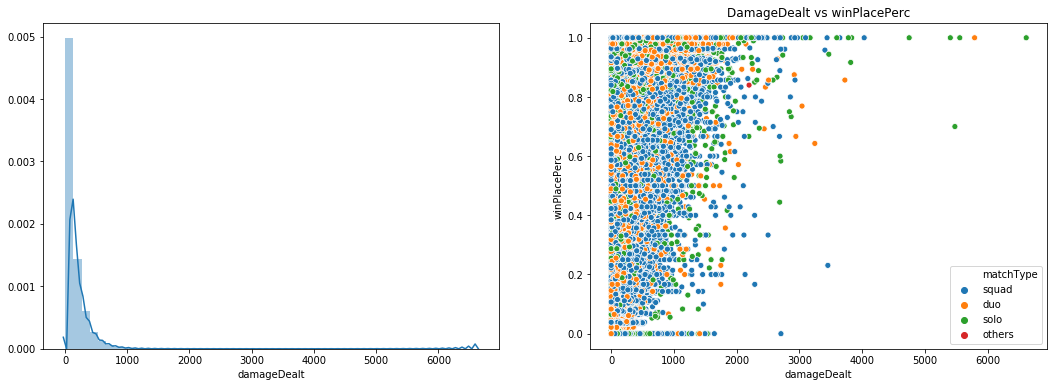

In [24]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.distplot(pubg.damageDealt,kde=True,ax=ax[0])
plt.title('Density Graph of DamageDealt')
sns.scatterplot('damageDealt','winPlacePerc',hue='matchType',ax=ax[1],data=pubg)
plt.title('DamageDealt vs winPlacePerc')

In [25]:
pubg.groupby(['matchType'])['damageDealt'].mean()

matchType
duo       131.925694
others    104.338951
solo      119.123739
squad     133.982727
Name: damageDealt, dtype: float64

There isn't much difference between the means of damage dealt between the major three classes of matchTypes. But there is one thing which can be noted from the scatter plot above. See below :

In [26]:
pubg[(pubg['matchType']=='solo')&(pubg['winPlacePerc']==0)&(pubg['damageDealt']>500)].count()[0]

38

So what I did in the above line is basically, all those players who have dealt more than 500 damage to enemies in solo match but still managed to have a winPlacePerc of 0.0. Is this badluck or a case of outliers ?

In [27]:
pubg[(pubg['matchType']=='solo')&(pubg['winPlacePerc']==0)&(pubg['damageDealt']>1500)].count()[0]

1

Well now the above one is just sheer badluck !

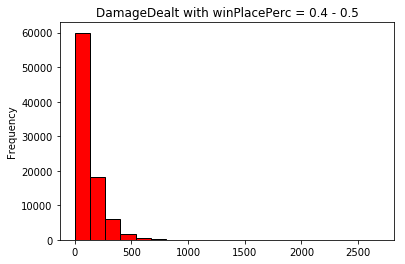

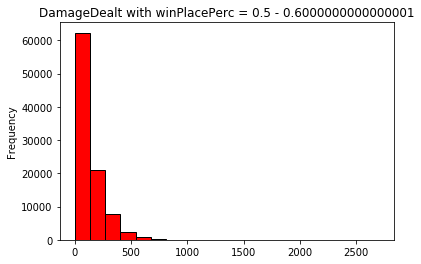

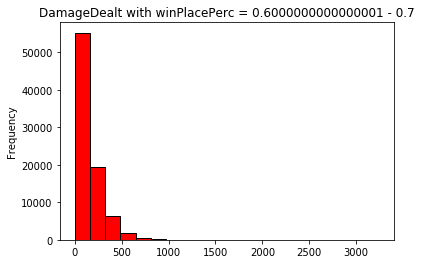

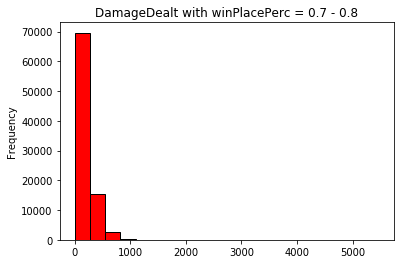

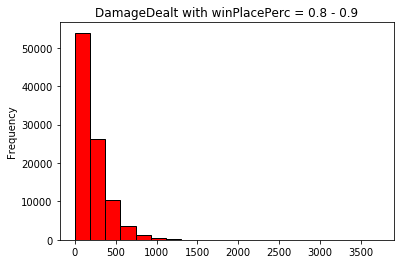

In [28]:
for i in range(5):    
    plt.title('DamageDealt with winPlacePerc = '+str(0.4+(i/10))+' - '+str(0.4+(i+1)/10))
    pubg[(pubg['winPlacePerc']>=0.4+(i/10))&(pubg['winPlacePerc']<0.4+((i+1)/10))].damageDealt.plot.hist(color='red',edgecolor='black',bins=20)
    plt.show()

The data above shows people who didn't really deal a lot of damage but still ended up getting a good place ! This well might be because of people hiding themselves for majority of the game (proners and campers) !

## 1.4 HeadShot Kills

HeadShotKills : Number of enemy players killed with headshots.

This should give us a better idea of how much probability a player has at winning than other similar attributes like kills since headshots are generally difficult to take and are taken by more skilled players

In [29]:
pubg['headshotKills'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,headshotKills
0,830846
1,129638
2,28290
3,7467
4,2231
5,815
6,316
7,176
8,86
9,40


/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5,1,'Headshot Kills vs winPlacePerc')

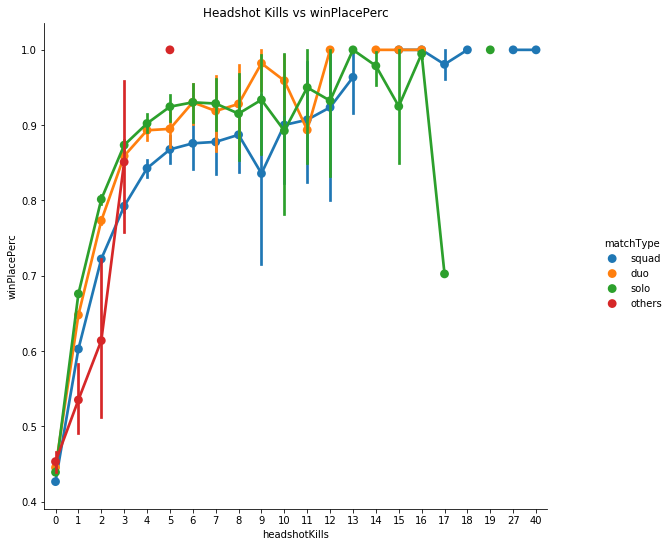

In [30]:
sns.factorplot('headshotKills','winPlacePerc',hue='matchType',data=pubg)
f = plt.gcf()
f.set_size_inches(10,8)
plt.title('Headshot Kills vs winPlacePerc')

HeadshotKills is very informative. As can be seen from the plot above, the more the headshots people have, the better the chances of winning.

#### Skill speaks for itself

In [31]:
x = pubg[(pubg['headshotKills']>5)&(pubg['winPlacePerc']>0.8)].count()[0]/pubg[pubg['headshotKills']>5].count()[0]*100
print('Percentage of people having more than 5 headshot kills and having winPlacePerc > 0.8 : ',x)

Percentage of people having more than 5 headshot kills and having winPlacePerc > 0.8 :  83.3099579243


## 1.5 Heals

Heals : Number of healing items used.(First aids, Bandages,MediKits)

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5,1,'Heals vs winPlacePerc')

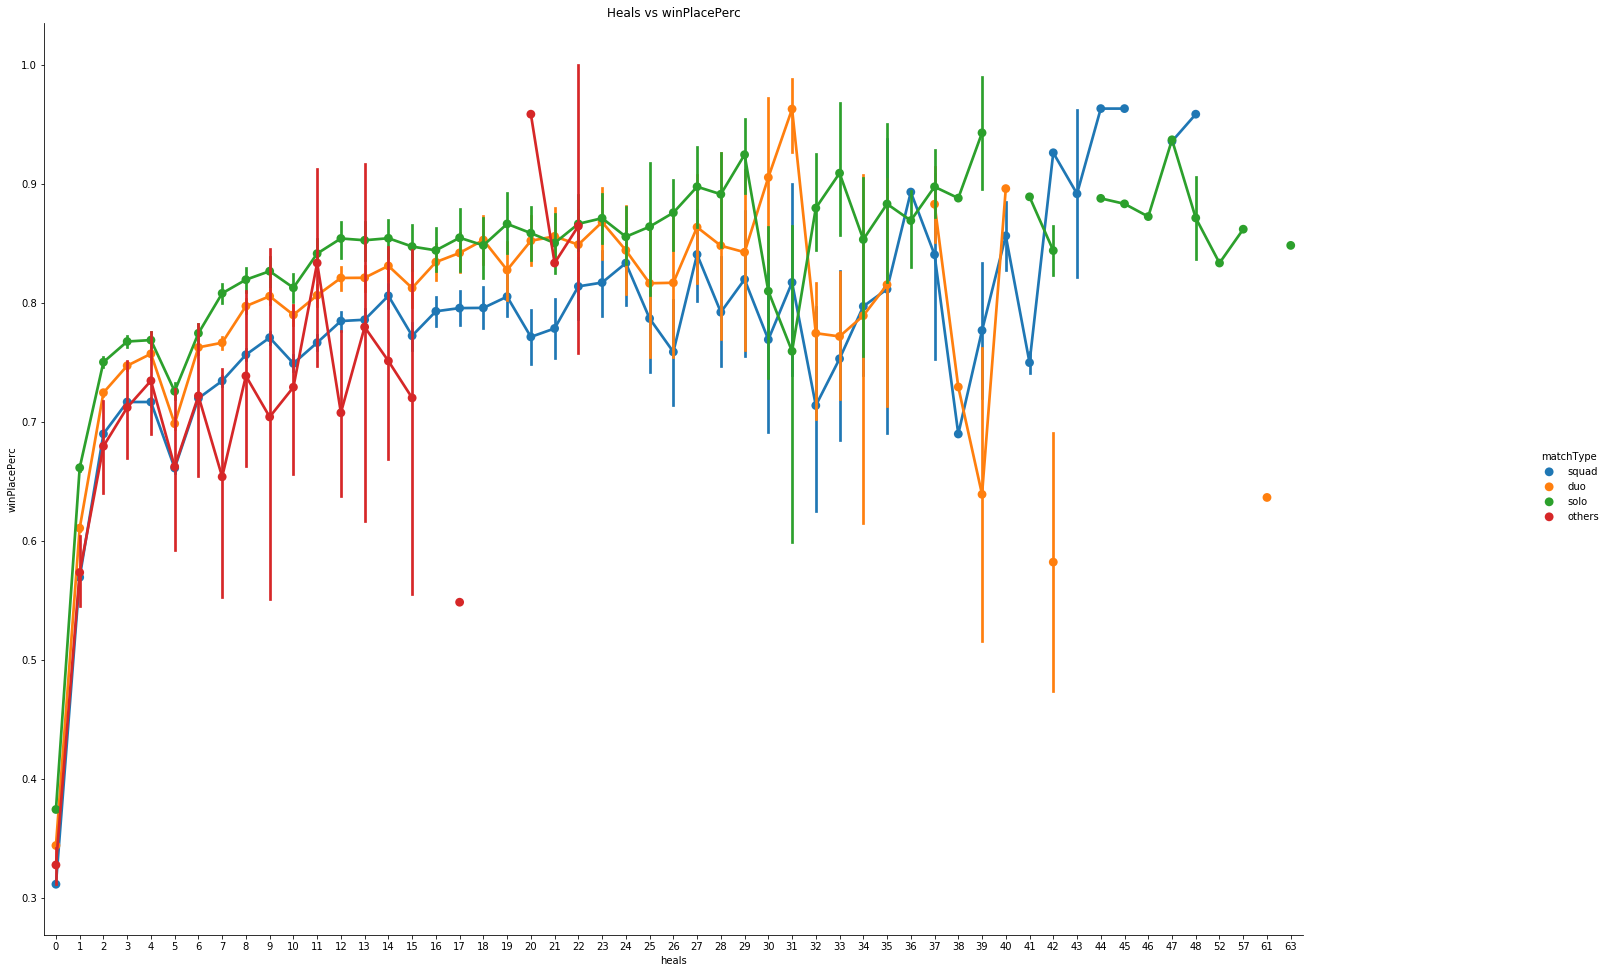

In [32]:
sns.factorplot('heals','winPlacePerc',hue='matchType',data=pubg)
f = plt.gcf()
f.set_size_inches(25,15)
plt.title('Heals vs winPlacePerc')

There are higher chances of ones winning if a person has used heals more than 0 times and understandably so ! Also solos have players using more healing items than duos or squads.

## 1.6 Kill Place

KillPlace : Ranking in match of number of enemy players killed. (Rank 1 means most players killed in that match)

Text(0.5,1,'KillPlace vs winPlacePerc')

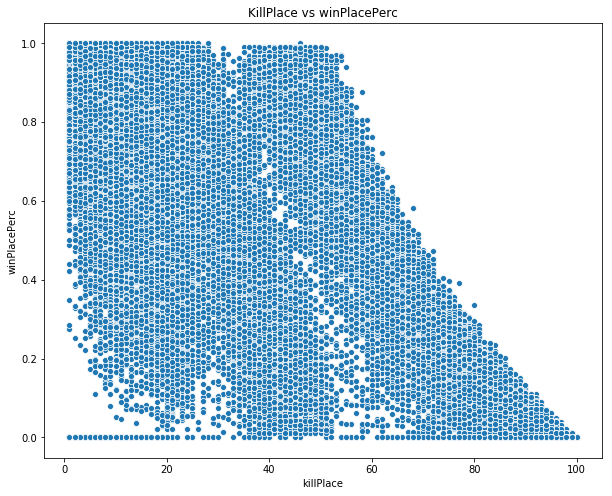

In [33]:
sns.scatterplot('killPlace','winPlacePerc',data=pubg[pubg['matchType']=='solo'])
f=plt.gcf()
f.set_size_inches(10,8)
plt.title('KillPlace vs winPlacePerc')

There seems to be a negative correlation between the two features and understandably so since if I am at rank 1 in kills in a match, I probably have achieved a good rank overall !

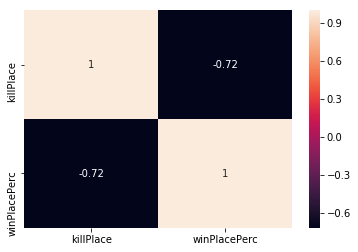

In [34]:
sns.heatmap(pubg[['killPlace','winPlacePerc']].corr(),annot=True)

The negative correlation can be seen from the above heatmap. I mean obviously the more kills I have, the lesser killPlace rank I will have, and hence better will be my chances of winning !

### Kill Points is a feature which is calculated by rankpoints feature. RankPoints is inconsistent and will be deprecated so I won't be using both of these features !

In [35]:
pubg.drop(['killPoints','rankPoints'],axis=1,inplace=True)

In [36]:
pubg.shape[1] #drop success !

27

## 1.7 Kill Streaks

KillStreaks : Max number of enemy players killed in a short amount of time

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5,1,'KillStreaks vs winPlacePerc')

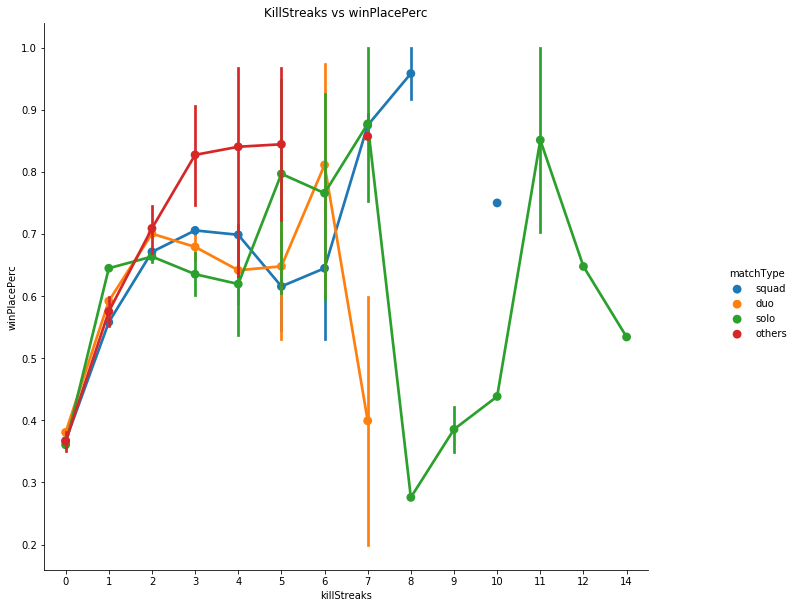

In [37]:
sns.factorplot('killStreaks','winPlacePerc',hue='matchType',data=pubg)
f = plt.gcf()
f.set_size_inches(12,9)
plt.title('KillStreaks vs winPlacePerc')

There isn't much that can be said about killstreaks since we can't really see a pattern ! I mean, I would expect someone with a killstream of 5 or above to have better chances of winning ! But the data doesn't follow the same intuition ! A lot of data who had 8 as killstreak only has < 0.3 as winPlacePerc

## 1.8 Kills

Kills : Number of enemy players killed.

Text(0.5,1,'Others')

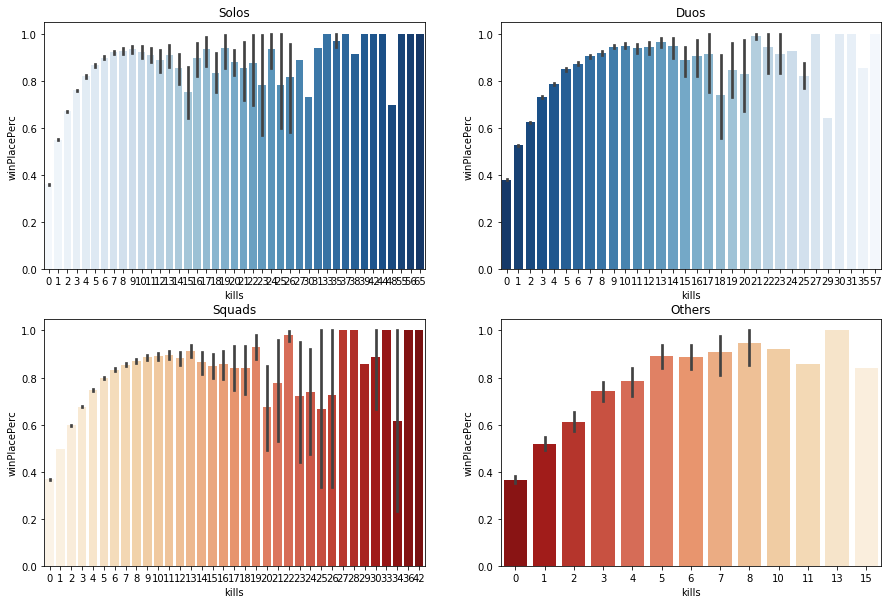

In [38]:
f,ax = plt.subplots(2,2,figsize=(15,10))
sns.barplot('kills','winPlacePerc',data=pubg[pubg['matchType']=='solo'],ax=ax[0,0],palette='Blues')
ax[0,0].set_title('Solos')
sns.barplot('kills','winPlacePerc',data=pubg[pubg['matchType']=='duo'],ax=ax[0,1],palette='Blues_r')
ax[0,1].set_title('Duos')
sns.barplot('kills','winPlacePerc',data=pubg[pubg['matchType']=='squad'],ax=ax[1,0],palette='OrRd')
ax[1,0].set_title('Squads')
sns.barplot('kills','winPlacePerc',data=pubg[pubg['matchType']=='others'],ax=ax[1,1],palette= 'OrRd_r')
ax[1,1].set_title('Others')

In all the matches, having higher kills generally corresponds to higher chances of winning ! There are some inconsistencies after 15 kills or higher in solos, duos, squads but that might be becuase players who want to fight don't really play to win, they just want to kill !

In [39]:
pubg['kills'].max()

65

Someone killed 65 players in a single match !!!!!!!!! You gotta be kidding me ! Let's see who he is :

In [40]:
pubg['kills'].argmax()

334400

In [41]:
pubg.iloc[334400].to_frame()

,334400
Id,810f2379261545
groupId,7f3e493ee71534
matchId,f900de1ec39fa5
assists,20
boosts,0
damageDealt,6616
DBNOs,0
headshotKills,13
heals,5
killPlace,1


DAMN DAWGGGG !!!!! You got a bright future in your scope !

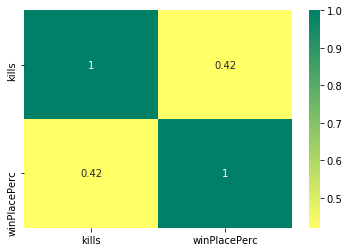

In [42]:
sns.heatmap(pubg[['kills','winPlacePerc']].corr(),cmap='summer_r',annot=True)

It is quite understandable to say the more kills you have the more chances you have to win/survive.

## 1.9 LongestKill

Longest Kill : The longest distance in meters a person has killed someone. 

Can be misleading sometimes since I can kill someone 1000m away who is knocked out ! But let's see

In [43]:
print('Longest Kill :',str(pubg['longestKill'].max()) + ' - AWM + 15x')
print('Shortest Kill :',str(pubg['longestKill'].min())+' - Pan Kill')

Longest Kill : 1094.0 - AWM + 15x
Shortest Kill : 0.0 - Pan Kill


Text(0.5,1,'LongestKill vs WinPlacePerc')

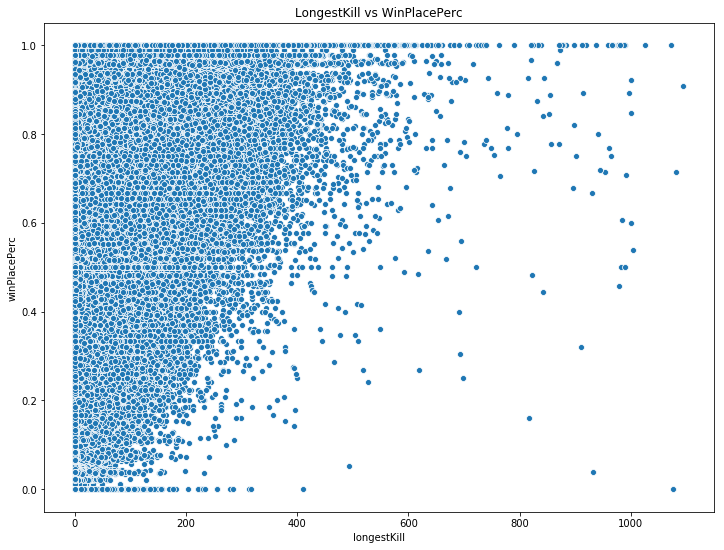

In [44]:
sns.scatterplot('longestKill','winPlacePerc',data=pubg)
f = plt.gcf()
f.set_size_inches(12,9)
plt.title('LongestKill vs WinPlacePerc')

Having high range kills would mean a better player and kinda understandably so!

In [45]:
x = pubg[(pubg['longestKill']>200)&(pubg['winPlacePerc']>0.8)].count()[0]/pubg[pubg['longestKill']>200].count()[0]*100
print('Percentage of people who had LongestKills > 200m and winPlacePerc > 0.8 :',x)

Percentage of people who had LongestKills > 200m and winPlacePerc > 0.8 : 70.0960512273


So people who had killed others with distance more than 200m have good chances of survival/winning !

## 1.10 MatchDuration

MatchDuration : Duration of match in seconds

Text(0.5,1,'Match duration Density Graph')

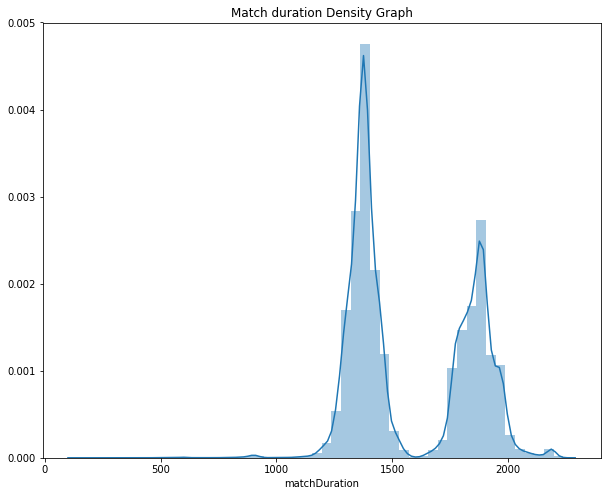

In [46]:
sns.distplot(pubg.matchDuration)
f = plt.gcf()
f.set_size_inches(10,8)
plt.title('Match duration Density Graph')

In [47]:
1400/60,1800/60

(23.333333333333332, 30.0)

So by data, the fights usually start at around 23 minutes of match start and majority of them die in this period as well(the first peak of the graph). This can be fourth or fixth last circle ! Then at 30 minutes, due to the last/second last circle, people have no other alternative apart from a one on one (see the second peak of the graph) 

## 1.11 Revives

Revives : Number of times this player revived teammates.

NOTE : This is going to be meaningless for solos !

In [48]:
pubg.groupby(['matchType'])['revives'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

Well it is easily understandable and can be verified by the above cross tab that squads are generally going to have moe revives than any other matchtype. Let's take a closer look at it !

Text(0.5,1,'Squad revives vs winPlacePerc')

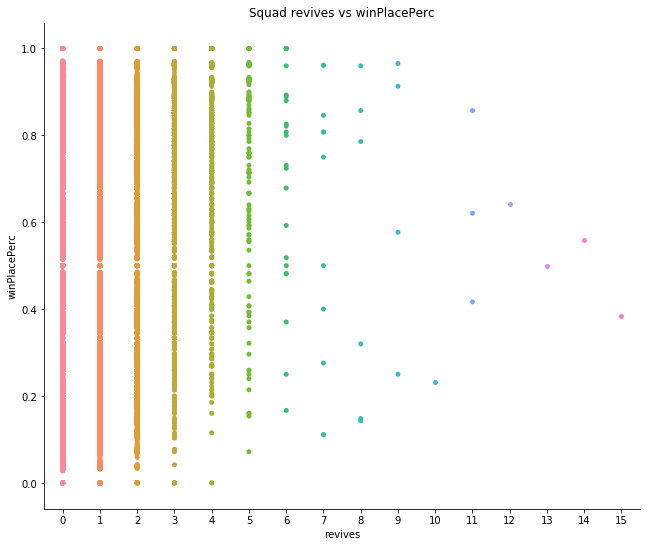

In [49]:
sns.catplot('revives','winPlacePerc',data=pubg[pubg.matchType=='squad'],jitter=False)
f=plt.gcf()
f.set_size_inches(10,8)
plt.title('Squad revives vs winPlacePerc')

The more the revives a player performs, the better his chances becomes at winning. But after 6 revives per player, the winning percentage decreases or a specific pattern can't be observed. This may be because you are being knocked out more often than not would make you a NOOB !

## 1.12 RideDistance

In [50]:
print('The highest ride distance by a player :',pubg['rideDistance'].max())

The highest ride distance by a player : 33970.0


How can someone travel 33KM in a single match ??? Can be a potential outlier !

Text(0.5,1,'rideDistance vs winPlacePerc')

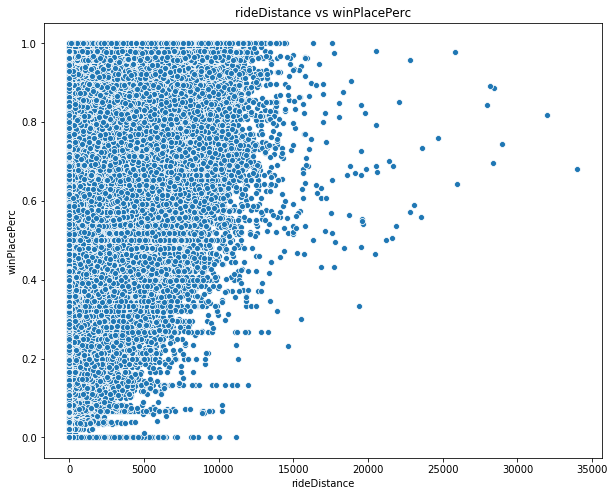

In [51]:
sns.scatterplot('rideDistance','winPlacePerc',data=pubg)
f=plt.gcf()
f.set_size_inches(10,8)
plt.title('rideDistance vs winPlacePerc')

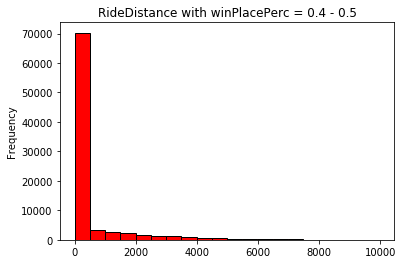

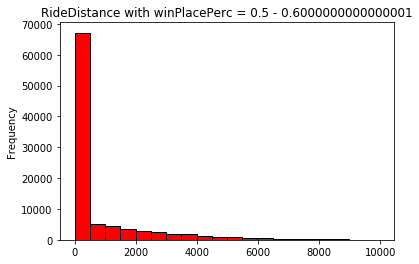

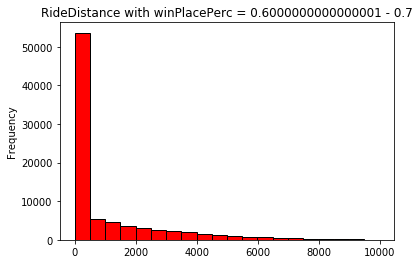

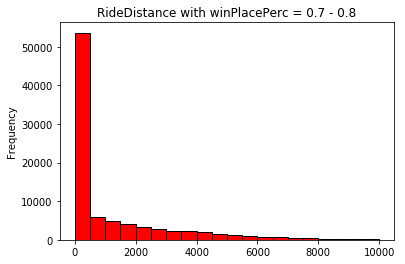

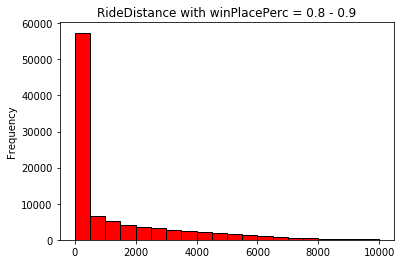

In [52]:
for i in range(5):    
    plt.title('RideDistance with winPlacePerc = '+str(0.4+(i/10))+' - '+str(0.4+(i+1)/10))
    pubg[(pubg['winPlacePerc']>=0.4+(i/10))&(pubg['winPlacePerc']<0.4+((i+1)/10))&(pubg['rideDistance']<10000)].rideDistance.plot.hist(color='red',edgecolor='black',bins=20)
    plt.show()

Ride distance increases for the players with hgh winPlacePerc. The increase is not substantial but can be seen !

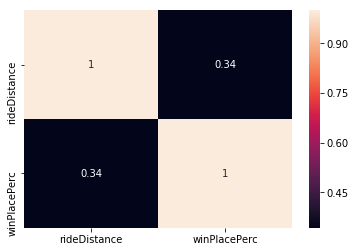

In [53]:
sns.heatmap(pubg[['rideDistance','winPlacePerc']].corr(),annot=True)

There is still a positive correlation between the two !

## 1.13 RoadKills

RoadKills : Number of kills when in vehicle

In [54]:
pubg['roadKills'].value_counts()

0    997096
1      2491
2       304
3        68
4        18
6         9
5         8
8         3
7         2
9         1
Name: roadKills, dtype: int64

Text(0.5,1,'RoadKills vs winPlacePerc')

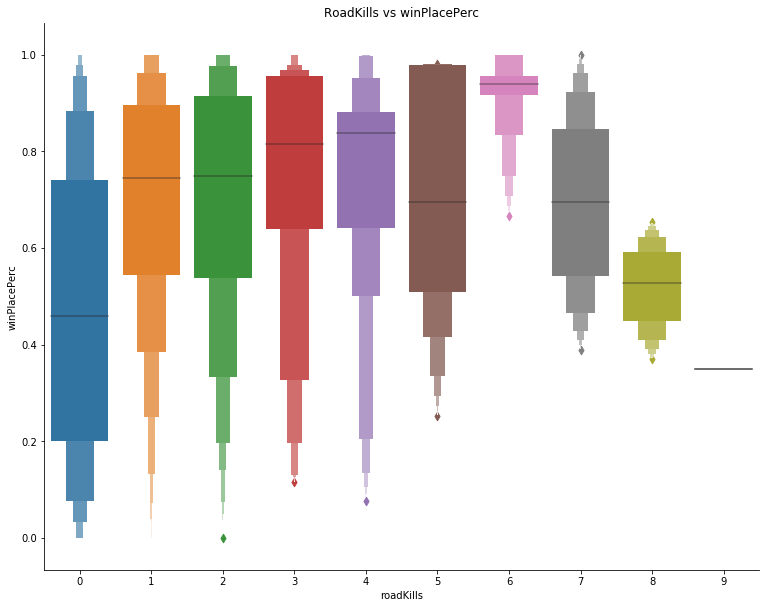

In [55]:
sns.catplot('roadKills','winPlacePerc',kind='boxen',data=pubg)
f = plt.gcf()
f.set_size_inches(12,9)
plt.title('RoadKills vs winPlacePerc')

Having higher roadkills means better chances of winning ! I didn't expect something like this. I personally have killed a lot of people and destroyed a lot of vehicles when in a vehicle, makes me a pro player I guess !

## 1.15 Team Kills

Team Kills : Number of times player killed team mates

Text(0.5,1,'TeamKills vs winPlacePerc (duos and squads only)')

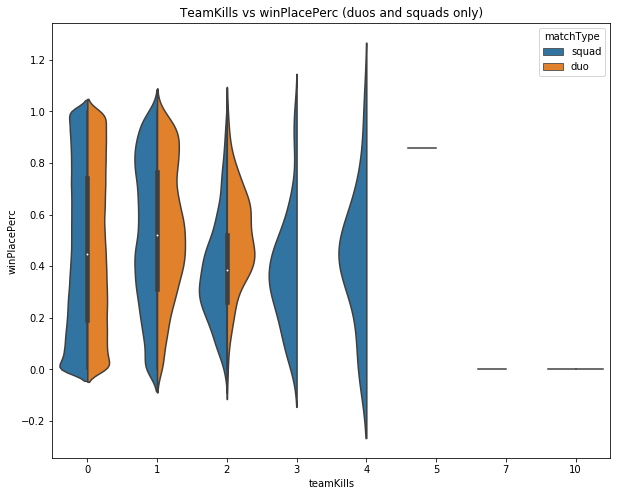

In [56]:
sns.violinplot('teamKills','winPlacePerc',hue='matchType',data=pubg[(pubg['matchType']=='squad')|(pubg['matchType']=='duo')],split=True)
f = plt.gcf()
f.set_size_inches(10,8)
plt.title('TeamKills vs winPlacePerc (duos and squads only)')

Players who do have some team kills are comparitively less in numbers who have higher winPlacePerc ! This is something I am glad to see, because of the traitors and my brothers also who have betrayed me in an otherwise great match !

## 1.16 VehiclesDestroyed


VehiclesDestroyed : The number of vehicles destroyed by a single player !

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5,1,'VehiclesDestroyed vs winPlacePerc')

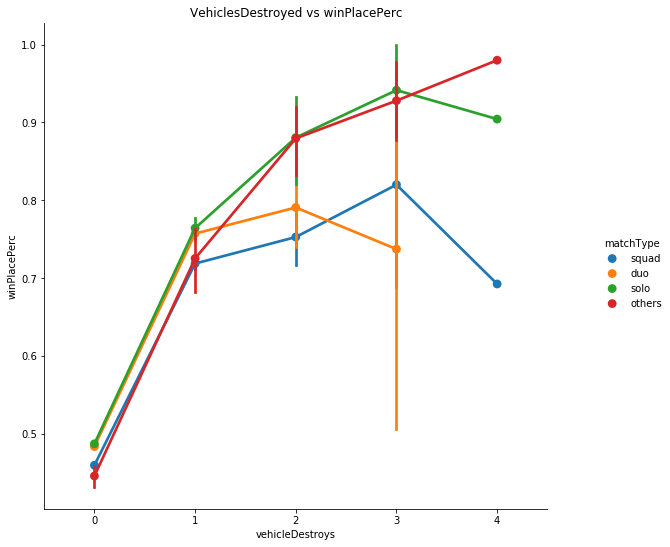

In [57]:
sns.factorplot('vehicleDestroys','winPlacePerc',hue='matchType',data=pubg)
f=plt.gcf()
f.set_size_inches(10,8)
plt.title('VehiclesDestroyed vs winPlacePerc')

Damn ! Someone who has destroyed even a single vehicle or more proves to be having a higher chance of survival and winPlacePercentage. Terminator !

## 1.17 WalkDistance

Walkdistance : Distance walked by player in metres

In [58]:
#below represents people who haven't moved a single step but still had more than 0 kill
pubg[(pubg['walkDistance']==0)&(pubg['kills']>0)].count()[0]

368

Cheaters ! Hackers ! Might even have one data row of my hacker brother !

In [59]:
pubg.drop(pubg[(pubg['walkDistance']==0)&(pubg['kills']>0)].index,inplace=True)

Text(0.5,1,'WalkDistance vs winPlacePerc')

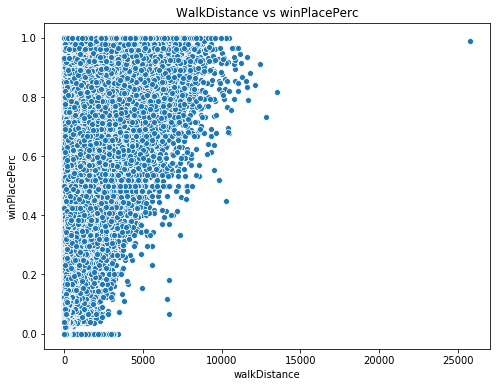

In [60]:
sns.scatterplot('walkDistance','winPlacePerc',data=pubg)
f = plt.gcf()
f.set_size_inches(8,6)
plt.title('WalkDistance vs winPlacePerc')

Text(0.5,1,'WalkDistance Frequency')

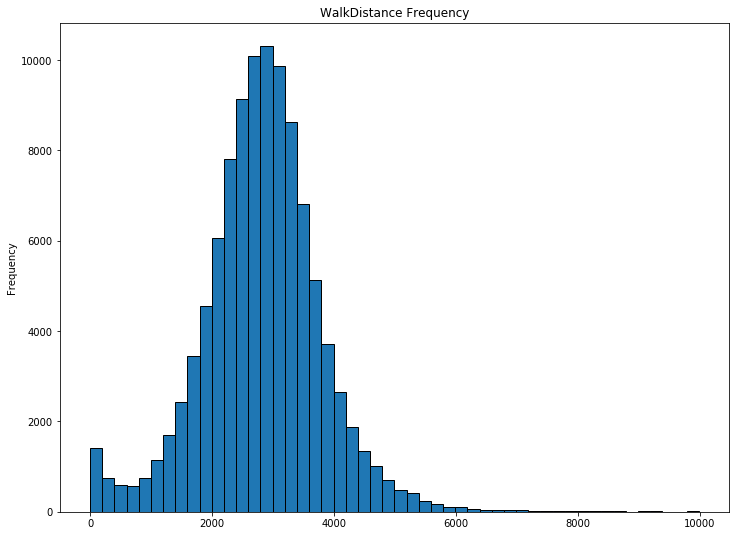

In [61]:
# Most of the data have walkdistance value < 10000m. So that's why I have put a limit on it in below code
pubg[(pubg['winPlacePerc']>0.9)&(pubg['walkDistance']<10000)].walkDistance.plot.hist(bins=50,edgecolor='black')
f = plt.gcf()
f.set_size_inches(12,9)
plt.title('WalkDistance Frequency')

The above graph looks like a normal distribution. This checks with the fact that the circle forms randomly and by Central Limit Theoremm, half of the people actually have to walk towards the circle whereas other half are going to be inside ! This can be verified by the average distance walked. Let's see

In [62]:
pubg['walkDistance'].mean()

1155.3097769711053

In [63]:
print(pubg['walkDistance'].max())
print("How the hell can someone walk a fu****g 25 Km. Let's see who he actually is !")
pubg[pubg['walkDistance']>25000].iloc[0,:].to_frame()

25780.0
How the hell can someone walk a fu****g 25 Km. Let's see who he actually is !


,497965
Id,3304d0c68e27f5
groupId,503757159d22dd
matchId,ce88f9c8c35bdf
assists,0
boosts,0
damageDealt,0
DBNOs,0
headshotKills,0
heals,0
killPlace,46


#### Usain Bolt Bolt Bolt !!!!!!


## 1.18 Weapons Acquired

Weapon Acquired : Number of weapons picked up

Text(0.5,1,'Weapons Acquired vs winPlacePerc')

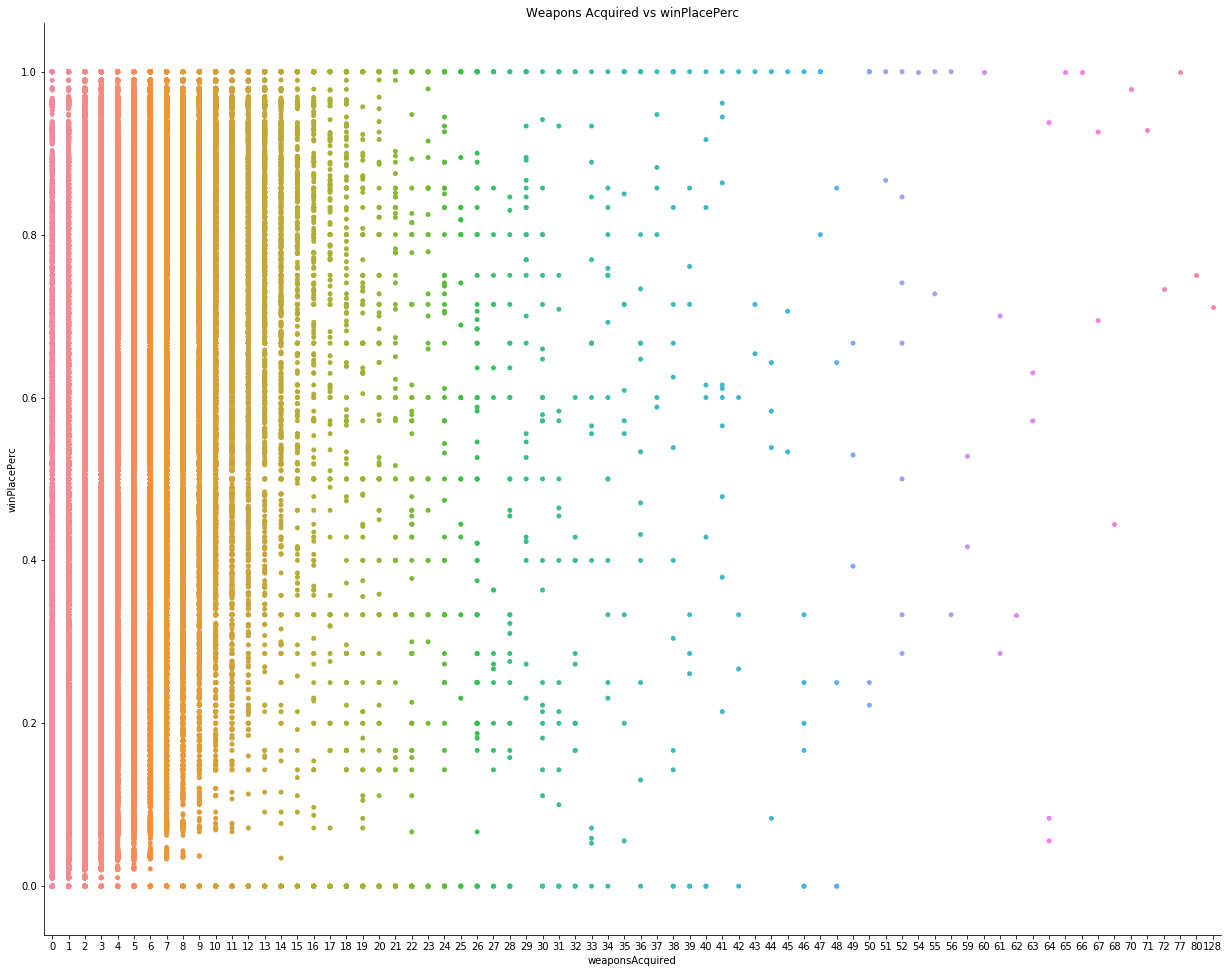

In [64]:
sns.catplot('weaponsAcquired','winPlacePerc',data=pubg, jitter=False)
f=plt.gcf()
f.set_size_inches(20,15)
plt.title('Weapons Acquired vs winPlacePerc')

There seems to be a positive correlation between weapons acquired and winPlacePerc. Let's see !

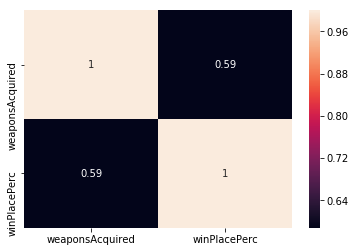

In [65]:
sns.heatmap(pubg[['weaponsAcquired','winPlacePerc']].corr(),annot=True)

There is a positive correlation indeed !

## 1.19 Correlation Matrix

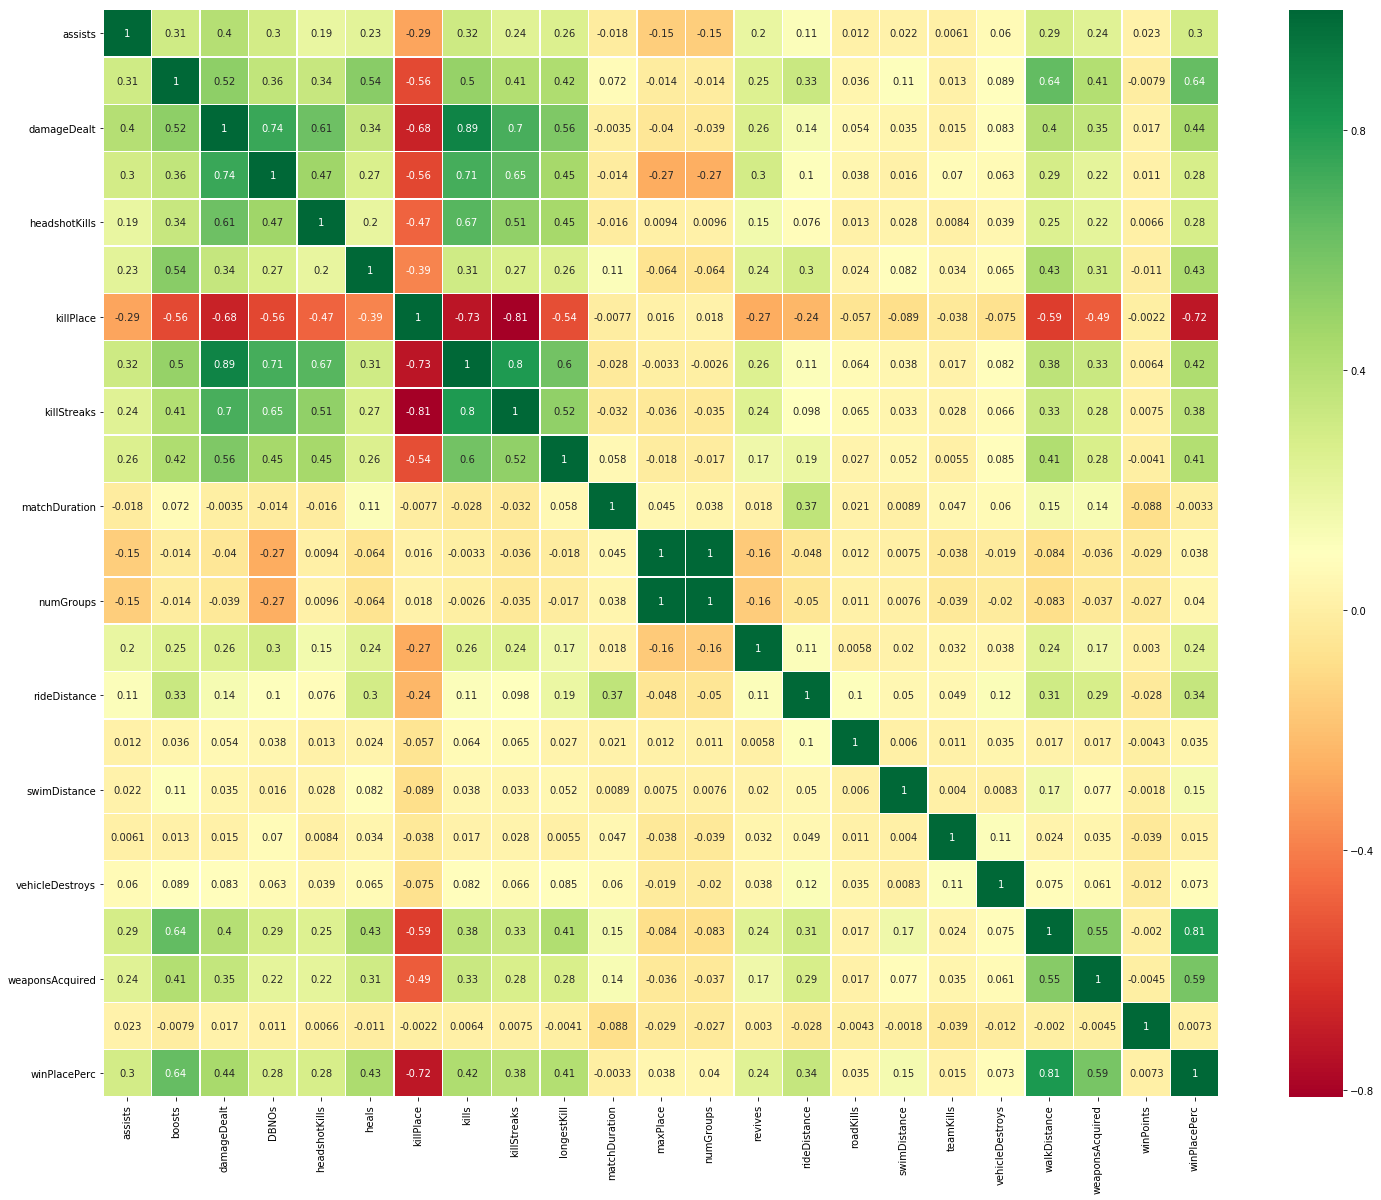

In [66]:
sns.heatmap(pubg.corr(),annot=True,linewidths=0.5,cmap='RdYlGn')
f = plt.gcf()
f.set_size_inches(25,20)

Correlation with winPlacePerc : 

1. Boosts have a higher correlation with winPlacePerc even more than heals.
2. KillPlace and winPlacePerc have high negative correlation which is something we saw above !
3. DamageDealt,Heals,Kills,KillStreaks,LongestKill,RideDistance,WeaponsAcquired all of these have considerable correlation with winPlacePerc as well.
4. WalkDistance seems to have the highest correlation with winPlacePerc which can prove to be useful in a prediction model !

# Tableau and Analysis

In [67]:
%%html
<div class='tableauPlaceholder' id='viz1548504873335' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;26&#47;266JW6WP2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;266JW6WP2' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;26&#47;266JW6WP2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1548504873335');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1029px';vizElement.style.height='722px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                   
vizElement.parentNode.insertBefore(scriptElement, vizElement);    
</script>

The above is a tableau created dashboard. It is an interactive dashboard which you can interact with using hover or selecting a particular bubble. Do that to understand better !

The bigger the bubble is, the more the data it holds.

What is particularly interesting about this workbook is, when you analyse this workbook, the amount of kills/weapons aqcuired etc. are going to be generally more for winPlacePerc = 1.0 and less for winPlacePerc = 0, giving an indication of positive correlation within the variables except for killPlace in which as we saw above, a negative correlation can be observed ! 

# 2. Feature Engineering

## 2.1 Health

The first thing I am going to do is to combine heals and boosts since survival in a game is mostly governed by these two !

In [71]:
pubg['health'] = pubg['heals'] + pubg['boosts']

Let's see how the combined correlation compares to that of individual heals and boosts :

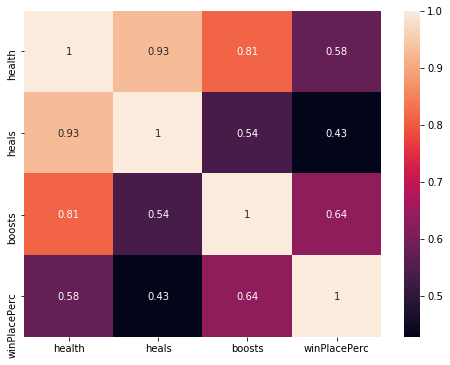

In [72]:
sns.heatmap(pubg[['health','heals','boosts','winPlacePerc']].corr(),annot=True)
f=plt.gcf()
f.set_size_inches(8,6)

Correlation of health with winPlacePerc is comaparitively lower than just with boosts. But this helps us with two things. Our model won't overfit with keeping just boosts as the prime feature winPlacePerc is based on and also heals and boosts combined together will make for a more robust prediction ! We'll see afterwards if just keeping boosts instead of our new feature health has more impact on our predictions or not !

## 2.2 HeadshotSkill

As I talked about in the above section, a player who is known to take more headshots will generally be a more skilled and a worthy winner indeed. Now headshot kills represent the number of enemies killed by headshots. This generally can be misleading since if I killed only one player that too by headshot, this might have happened out of sheer chance ! Also if I killed 5 people out of which only 1 was by headshot, I may not be skilled enough. So I am going to create a feature HeadshotSkill which would accurately depict my skill level based on data and is formed below : 

In [73]:
def head(c):
    if(c[0]==0):
        return 0
    elif(c[1]==0):
        return 0
    else:
        return c[0]/c[1]
pubg['headshotSkill'] = pubg[['headshotKills','kills']].apply(head,axis=1)

In [74]:
pubg.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,health,headshotSkill
count,999632.000000,999632.000000,999632.000000,999632.000000,999632.000000,999632.000000,999632.000000,999632.000000,999632.000000,999632.000000,...,999632.000000,999632.000000,999632.000000,999632.000000,999632.000000,999632.000000,999632.000000,999632.000000,999632.000000,999632.000000
mean,0.232504,1.108203,130.740513,0.658274,0.226545,1.368573,47.611430,0.923978,0.544012,22.978770,...,0.003516,4.516943,0.023929,0.007878,1155.309777,3.657240,608.054783,0.472755,2.476775,0.103160
std,0.586212,1.716178,170.857283,1.145607,0.597941,2.675122,27.474579,1.555304,0.711150,50.863485,...,0.074099,30.402729,0.168226,0.092196,1183.968676,2.440215,740.048756,0.307465,3.875357,0.260477
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,155.800000,2.000000,0.000000,0.200000,0.000000,0.000000
50%,0.000000,0.000000,84.300000,0.000000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,686.600000,3.000000,0.000000,0.458300,1.000000,0.000000
75%,0.000000,2.000000,186.000000,1.000000,0.000000,2.000000,71.000000,1.000000,1.000000,21.310000,...,0.000000,0.000000,0.000000,0.000000,1977.000000,5.000000,1495.000000,0.740700,4.000000,0.000000
max,21.000000,33.000000,6616.000000,38.000000,40.000000,63.000000,100.000000,65.000000,14.000000,1094.000000,...,9.000000,2295.000000,10.000000,4.000000,25780.000000,128.000000,2001.000000,1.000000,69.000000,1.000000


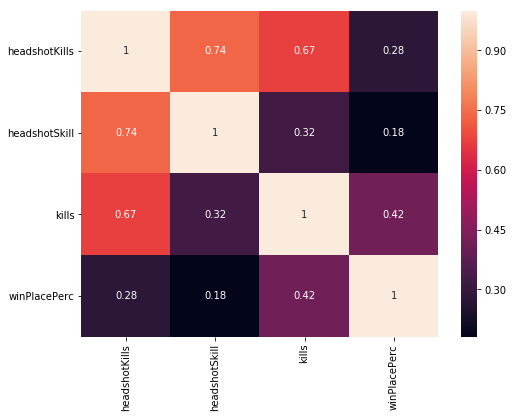

In [75]:
sns.heatmap(pubg[['headshotKills','headshotSkill','kills','winPlacePerc']].corr(),annot=True)
f=plt.gcf()
f.set_size_inches(8,6)

I might have been wrong with my intuition since clearly there is no correlation between the two targets. Nevertheless I will keep this feature with me to see if it produces something desirable while building the model !

## 2.3 DistanceCovered

In [76]:
pubg['distanceCovered'] = pubg['walkDistance']+pubg['rideDistance']+pubg['swimDistance']

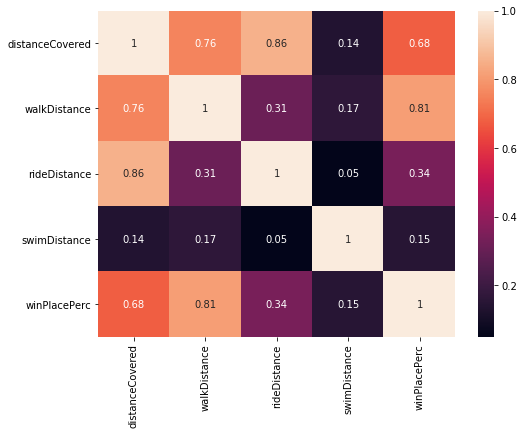

In [77]:
sns.heatmap(pubg[['distanceCovered','walkDistance','rideDistance','swimDistance','winPlacePerc']].corr(),annot=True)
f=plt.gcf()
f.set_size_inches(8,6)

## 2.4 ActualKills

I personally despise team kills a lot and obviously if a match is based on team vs team, having lesser membes is a disadvantage !

In [78]:
pubg['actualKills'] = pubg['kills'] - pubg['teamKills']

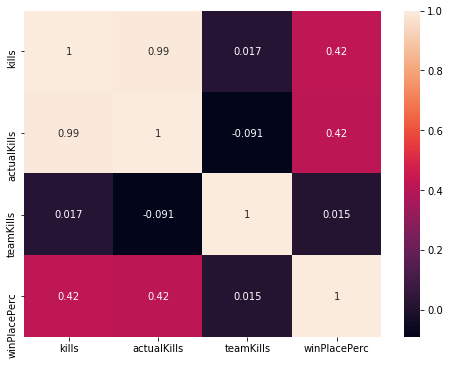

In [79]:
sns.heatmap(pubg[['kills','actualKills','teamKills','winPlacePerc']].corr(),annot=True)
f=plt.gcf()
f.set_size_inches(8,6)

# 3. Predictive Modeling 

I am going  to predict the output using two models, Linear Regression and MultiLayerPercentron Model offered by scikit-learn

## 3.1 Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
pubg.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'kills', 'killStreaks',
       'longestKill', 'matchDuration', 'matchType', 'maxPlace', 'numGroups',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'health', 'headshotSkill', 'distanceCovered',
       'actualKills'],
      dtype='object')

In [82]:
pubg1 = pubg[['assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'kills', 'killStreaks',
       'longestKill', 'matchDuration',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc']]

In [83]:
from sklearn import preprocessing

x = pubg1.values #returns a numpy array
ss = preprocessing.StandardScaler()
x_scaled = ss.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,:20],df.iloc[:,20:21],random_state=0,test_size=0.2)

In [86]:
model = LinearRegression()

In [87]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
model.score(x_test,y_test)

0.8225625798507511

In [89]:
pubg2 = pubg[[ 'assists', 'damageDealt', 'DBNOs',
        'killPlace', 'killStreaks',
       'longestKill', 'matchDuration', 'maxPlace', 'numGroups',
       'revives', 'roadKills',
       'vehicleDestroys', 'weaponsAcquired', 'winPoints',
        'health', 'headshotSkill', 'distanceCovered',
       'actualKills','winPlacePerc']]

In [90]:
x_train,x_test,y_train,y_test = train_test_split(pubg2.iloc[:,:18],pubg2.iloc[:,18:19],random_state=0,test_size=0.2)
model2 = LinearRegression()
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.78286479937730236

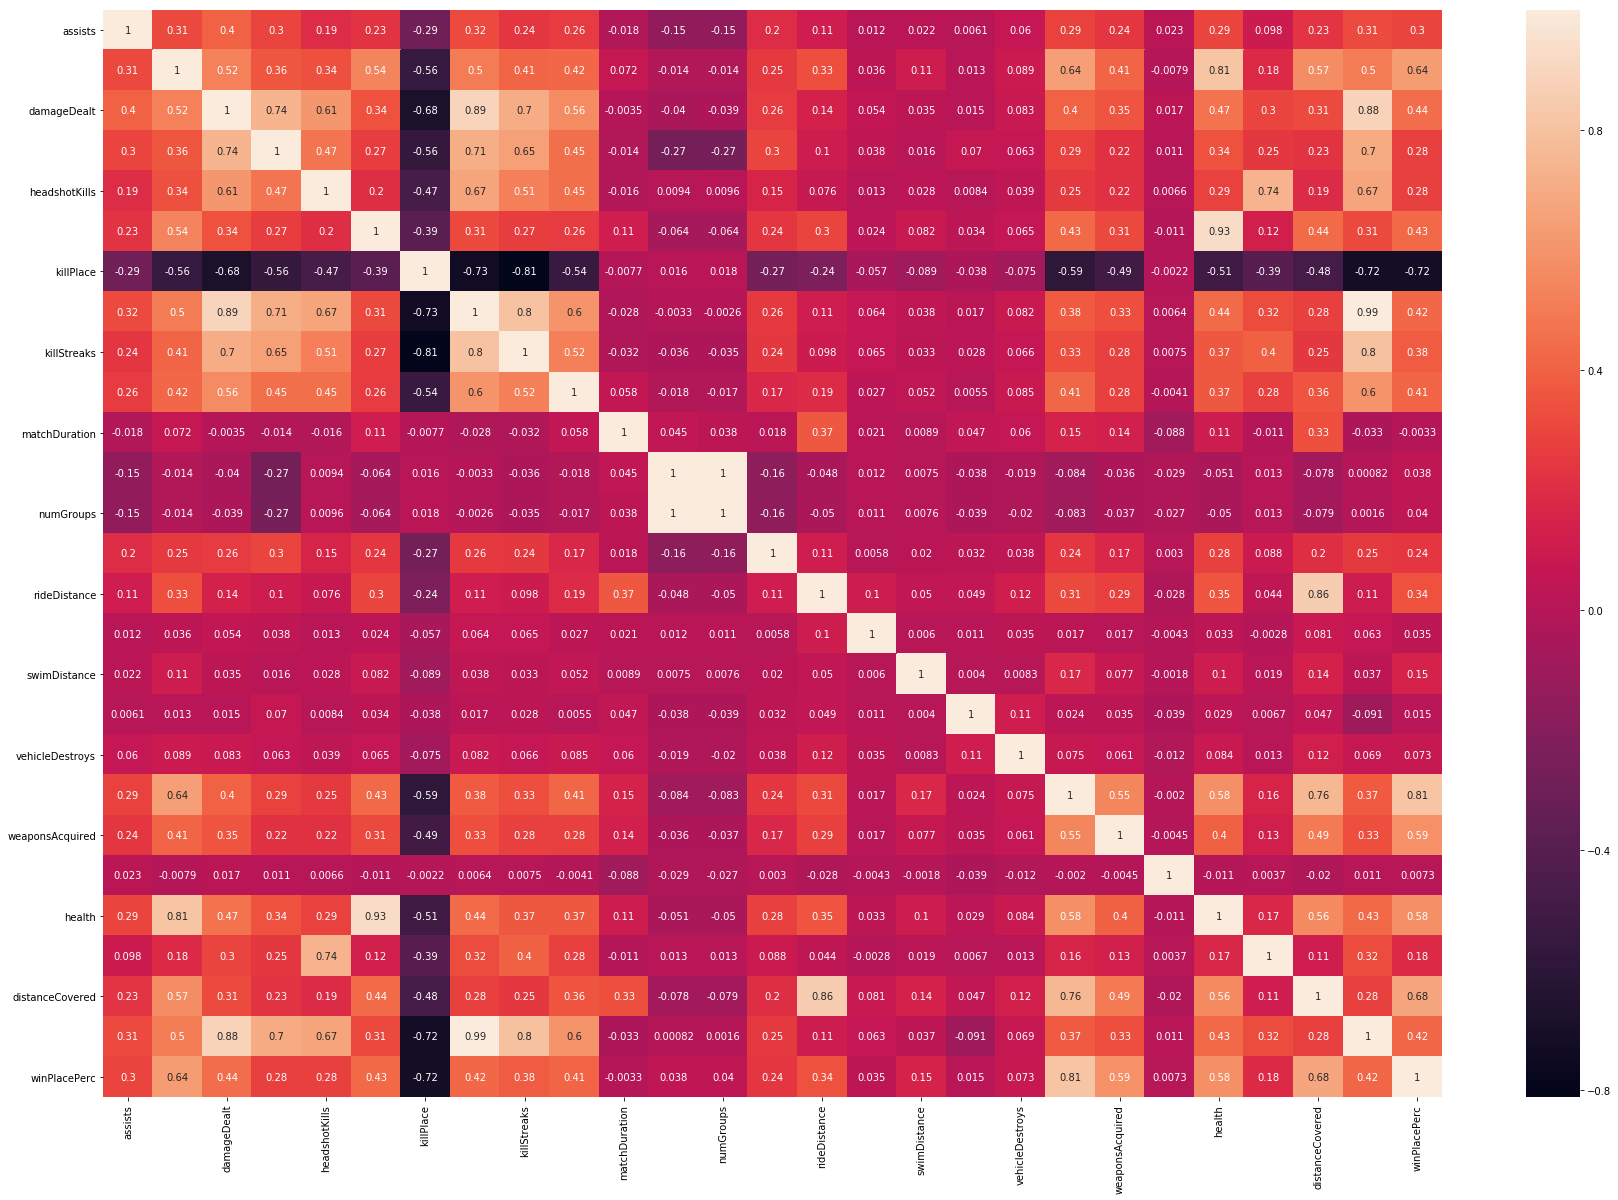

In [91]:
pubg = pubg[['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'kills', 'killStreaks',
       'longestKill', 'matchDuration', 'matchType', 'maxPlace', 'numGroups',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
        'health', 'headshotSkill', 'distanceCovered',
       'actualKills','winPlacePerc']]
sns.heatmap(pubg.corr(),annot=True)
f = plt.gcf()
f.set_size_inches(30,20)

In [92]:
pubg.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'kills', 'killStreaks',
       'longestKill', 'matchDuration', 'matchType', 'maxPlace', 'numGroups',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'health', 'headshotSkill', 'distanceCovered', 'actualKills',
       'winPlacePerc'],
      dtype='object')

In [93]:
pubg3 = pubg[[ 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'kills', 'killStreaks',
       'longestKill', 'matchDuration', 'maxPlace', 'numGroups',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'health', 'headshotSkill', 'distanceCovered', 'actualKills',
       'winPlacePerc']]

In [97]:
x_train,x_test,y_train,y_test = train_test_split(pubg3.iloc[:,:26],pubg3.iloc[:,26:27],random_state=0,test_size=0.2)
model2 = LinearRegression()
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.83428211735630031

## 3.2 MLP NeuralNet

In [95]:
from sklearn.neural_network import MLPRegressor

In [ ]:
model3 = MLPRegressor()
model3.fit(x_train,y_train)
model3.score(x_test,y_test)

This takes a hell lot of time and gives a score of around 0.851650

Hyper parameter tuning for mlp model will not be possible on my personal machine because of high amounts of computational power required as well as the time needed... You cando it if you like, on goodle colab or cloud maybe !